# NBA Player Career Projection #
## _DSCI 100 Group Project_ ##

## Introduction ## 

Prompts:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

Basketball is a globally renowned sport with a massive following, and the professional leagues are the pinnacle of talent and competition. Understanding player statistics is essential for team management, player evaluation, and fan engagement. The `all_seasons` dataset captures data that outlines the performance of basketball players across various seasons (from 1996-1997 season to 2022-2023 season). Using this dataset, our predictive question could be, for instance, how a player's attributes and performance in their rookie seasons relate to their overall career performance. The dataset encompasses several key attributes, including:

- `player_name`, name of a NBA player 
- `team_abbreviation`, abbreviated name of the team they played on
- `age`, a player's age
- `player_height`, a player's height
- `player_weight`, a player's weight 
- `college`, the college they played for
- `country`, their nationality
- `draft_year`, the year they were drafted
- `draft_round`, the round they were drafted in
- `draft_number`, the pick number they were drafted with
- `gp`, number of games played in a season
- `pts`, average points per game in a season
- `reb`, average rebounds per game in a season
- `ast`, average assists per game in a season
- `net_rating`, average net rating in a season
- `oreb_pct`, average offensive rebound percentage in a season
- `dreb_pct`, average defensive rebound percentage in a season
- `usg_pct`, average usage percentage in a season
- `ts_pct`, average true shooting percentage in a season
- `ast_pct`, average assist percentage in a season
- `season`, the season they played in which these stats were recorded


By analyzing this dataset, we aim to draw insights and patterns from past player statistics, potentially aiding in the selection, trading, and performance prediction of rookie players in future basketball seasons by estimating their potential through statistics. 

### Research question: ###
__How does a player's physical attributes and scoring statistics in their rookie year correlate to their total career points?__ We will attempt to answer this question by forming a regression line using physical attributes and scoring statistics of past players, and more specifically: `pts` (points per game), `gp` (games played), `player_height` (cm), `player_weight` (kg), `usg_pct` (usage percentage) and `ts_pct` (true shooting percentage).

## Methods and results ##

- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
    - loads data from the original source on the web 
    - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
    
note: all tables and figure should have a figure/table number and a legend

## Preliminary exploratory data analysis ##

From the preliminary exploratory data analysis completed in our project proposal, we demonstrated that we can read the NBA data set can be read by downloading the dataset from the website (link: https://www.kaggle.com/datasets/justinas/nba-players-data/) and read into R using read_csv from the tidyverse library. We have stored it in the "data" folder. 

In our preliminary exploratory data analysis, we also completed necessary steps to tidy the data to ensure consistency, remove irrelevant information, and maintain the three criteria necessary for tidy data: each column is a variable, each row is a single observation, and each cell is a value. 

In [28]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [31]:
# importing the tidyverse library
library(tidyverse)
library(tidymodels)
library(repr)
library("kknn")

Throughout this report, the data set we will work with is named `all_seasons.csv` and it lives in the `/data` directory. Below, we read the dataset using `read_csv` and used `head` to look at the first 6 rows of the dataset to ensure that we have read the correct dataset. 

In [2]:
# reading the dataset in the data folder
nba_raw <- read_csv("data/all_seasons.csv")
# looking at the the first 6 rows
tail(nba_raw)

New names:
• `` -> `...1`
Rows: 12844 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): player_name, team_abbreviation, college, country, draft_year, draf...
dbl (14): ...1, age, player_height, player_weight, gp, pts, reb, ast, net_ra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,⋯,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12838,Joe Wieskamp,TOR,23,198.12,92.98636,Iowa,USA,2021,2,⋯,1.0,0.4,0.3,1.0,0.000,0.068,0.115,0.321,0.083,2022-23
12839,Joel Embiid,PHI,29,213.36,127.00576,Kansas,Cameroon,2014,1,⋯,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20,213.36,86.18248,Florida State,USA,Undrafted,Undrafted,⋯,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25,205.74,102.51179,Wake Forest,USA,2017,1,⋯,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24,208.28,113.39800,Texas,USA,2021,2,⋯,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,JaMychal Green,GSW,33,205.74,102.96538,Alabama,USA,Undrafted,Undrafted,⋯,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


**Table 1.** Table of the first 6 rows of raw data from all_seasons.csv

### Data tidying ###
Looking at the columns, we see that `draft_year` and `draft_round` are character columns, instead of numeric. Upon investigation into the data we see that this is because some players came into the NBA league undrafted and were picked up by teams through other methods, and thus are marked as `undrafted` under the `draft_year` and `draft_round` columns. Since we want to select and use rookie players who have only played in the 2022 season as our test data, we must filter out players who have played in more than one season for training and players who have only played in 2022 season for test data. However, because some players went undrafted, it is difficult to determine what year those players were rookies. (If we say that a player is a rookie in the first season of all the observations we have of them, then what happens if the first season of all the observations we have of them is the first season recorded in this data set and they were undrafted? Since we have no data of earlier seasons we wouldn't know if that season was truly their rookie season.) Thus, to make data manipulation and analysis easier, we will only consider players that were drafted.

Since `college`, `country` and the team that they played for (`team_abbreviation`) are completely irrelevant to our data analysis, we will select the rest of the columns during our data processing. Additionally, to make data manipulation easier, we will also change season into a numeric value by only keeping the year the season began (ex. "1996-1997" into 1996).

In [3]:
nba_data <- nba_raw |>
    filter(draft_year != "Undrafted" & draft_round != "Undrafted" & draft_number != "Undrafted") |>
    separate(season, into = c("season_start", "season_end"), "-") |>
    mutate(season_start = as.numeric(season_start), draft_year = as.numeric(draft_year), 
           draft_round = as.numeric(draft_round), draft_number = as.numeric(draft_number)) |>
    select(player_name, age:player_weight, draft_year:season_start) 
# looking at the first 6 rows of tidied data
head(nba_data)

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Randy Livingston,22,193.04,94.80073,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
Gaylon Nickerson,28,190.50,86.18248,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
George Lynch,26,203.20,103.41898,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996
George McCloud,30,203.20,102.05820,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996
George Zidek,23,213.36,119.74829,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
Gerald Wilkins,33,198.12,102.05820,1985,2,47,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996


**Table 2.** Table of the first 6 rows of tidied `all_seasons` data

Prompts: 
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

## Methods ##

Prompts 
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

- Describe at least one way that you will visualize the results

Response

- To conduct our experiment, we will use the knn regression model using the columns `pts` (points per game), `gp` (games played), `player_height` (cm), `player_weight` (kg), `usg_pct` (usage percentage) and `ts_pct` (true shooting percentage) as predictors since these factors are likely to have a significant influence on the total number of points scored over a career. Using these, predictors, we will find the projected number of points a player will score based on the average of its K nearest neighbors where the K value will be determined through evaluation and tuning.

- We will use scatter plots, with a regression line to visualize the data and results as it will give a clear view on the K nearest neighbors to the point on a line. Futhermore we will make distinctions between amount of seasons played by the player by colors in plots.

Separating the data into training data and testing data.

In [49]:
# trying to separate data into training data (excludes rookies) and test data (rookies)
# nba_rookie <- nba_data |>
#    filter(draft_year == 2022)

# nba_non_rookies <- nba_data |>
#    filter(draft_year >= 1996, draft_year <= 2021) 

# nba_training <- nba_non_rookies |>
#    filter(draft_year == season_start) |>
#    select(player_name) |>
#    unique()

# the problem is that some players did not play in the season they were drafted, we can see that ray is not counted as a rookie even though he played 
# his first season in 2022 since he was drafted in 2021. 
# tail(nba_training)

# nba_ray <- nba_data |>
#    filter(player_name == "RaiQuan Gray")

# nba_ray

# this can be solved using this:
# df1[(df1$name %in% df2$name),] 
# or:
# library(dplyr)
# anti_join(df1, df2, by = "name")

# gets the first season they've played 
nba_first_season <- nba_data[match(unique(nba_data$player_name), nba_data$player_name),]

# first season of rookies (defined as first season is 2022)
nba_testing <- nba_first_season |>
    filter(season_start == 2022)

# first season of non-rookies where draft year is after 1996 and the first season they've played is not 2022
nba_training <- nba_first_season |>
    filter(draft_year >= 1996, season_start <= 2021)

nrow(nba_training)

# data of all seasons of non-rookies
nba_non_rookies_data <- nba_data[(nba_data$player_name %in% nba_training$player_name),] 
head(nba_non_rookies_data)

[1] 1346

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Randy Livingston,22,193.04,94.80073,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
Erick Dampier,21,210.82,120.20188,1996,1,10,72,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996
Jerome Williams,24,205.74,93.43995,1996,1,26,33,1.5,1.5,0.2,3.0,0.144,0.182,0.181,0.419,0.071,1996
John Wallace,23,205.74,102.05820,1996,1,18,68,4.8,2.3,0.5,2.7,0.080,0.148,0.204,0.571,0.081,1996
Jermaine O'Neal,18,210.82,102.51179,1996,1,17,45,4.1,2.8,0.2,1.3,0.099,0.198,0.199,0.494,0.030,1996
Jeff McInnis,22,193.04,86.18248,1996,2,37,13,5.0,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996


In [5]:
# finding career points of nba players drafted between 1996 and 2021 and played their first season before 2022 (inclusive)
nba_total_points <- nba_non_rookies_data |>
    group_by(player_name) |>
    summarize("total_points" = sum(pts*gp)) |>
    select("total_points")

nrow(nba_total_points)

# nba_training_labelled <- cbind(nba_training, nba_total_points)
# head(nba_training_labelled)

# new problem is that the players are sorted alphabetically in total points but chronologically in nba_training
# to solve this issue, we must sort nba_training alphabetically and then cbind

nba_training_ordered <- nba_training[order(nba_training$player_name),]
head(nba_training_ordered)

nba_training_labelled <- cbind(nba_training_ordered, nba_total_points)
head(nba_training_labelled)


[1] 1346

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.J. Bramlett,23,208.28,102.96538,1999,2,39,8,1.0,2.8,0.0,-32.6,0.158,0.208,0.146,0.190,0.000,1999
A.J. Guyton,23,185.42,81.64656,2000,2,32,33,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000
Aaron Brooks,23,182.88,73.02831,2007,1,26,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249,2007
Aaron Gordon,19,205.74,99.79024,2014,1,4,47,5.2,3.6,0.7,-5.6,0.064,0.171,0.156,0.517,0.064,2014
Aaron Gray,23,213.36,122.46984,2007,2,49,61,4.3,2.8,0.7,-1.0,0.127,0.188,0.221,0.529,0.113,2007
Aaron Holiday,22,185.42,83.91452,2018,1,23,50,5.9,1.3,1.7,7.0,0.008,0.088,0.206,0.518,0.180,2018


,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start,total_points
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A.J. Bramlett,23,208.28,102.96538,1999,2,39,8,1.0,2.8,0.0,-32.6,0.158,0.208,0.146,0.190,0.000,1999,8.0
2,A.J. Guyton,23,185.42,81.64656,2000,2,32,33,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000,441.0
3,Aaron Brooks,23,182.88,73.02831,2007,1,26,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249,2007,48.4
4,Aaron Gordon,19,205.74,99.79024,2014,1,4,47,5.2,3.6,0.7,-5.6,0.064,0.171,0.156,0.517,0.064,2014,1521.7
5,Aaron Gray,23,213.36,122.46984,2007,2,49,61,4.3,2.8,0.7,-1.0,0.127,0.188,0.221,0.529,0.113,2007,6263.7
6,Aaron Holiday,22,185.42,83.91452,2018,1,23,50,5.9,1.3,1.7,7.0,0.008,0.088,0.206,0.518,0.180,2018,7993.0


## Regression ##

Performing knn regression by tuning

In [37]:
set.seed(1234)
nba_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression") 

nba_recipe <- recipe(total_points ~ pts + gp + player_height + usg_pct + ts_pct, data = nba_training_labelled) |>
       step_scale(all_predictors()) |>
       step_center(all_predictors())

nba_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [38]:
set.seed(1234)
nba_vfold <- vfold_cv(nba_training_labelled, v = 5, strata = total_points)
nba_workflow <- workflow() |>
    add_recipe(nba_recipe) |>
    add_model(nba_spec)
nba_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [44]:
set.seed(1234)
gridvals <- tibble(neighbors = seq(from = 1, to = 201, by = 10))

nba_results <- nba_workflow |>
    tune_grid(resamples = nba_vfold, grid = gridvals) |>
    collect_metrics() 

nba_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6.890834e+03,5,2.234278e+02,Preprocessor1_Model01
1,rsq,standard,6.214469e-03,5,3.161514e-03,Preprocessor1_Model01
11,rmse,standard,4.859548e+03,5,1.119979e+02,Preprocessor1_Model02
11,rsq,standard,4.186821e-02,5,1.140464e-02,Preprocessor1_Model02
21,rmse,standard,4.761157e+03,5,1.099117e+02,Preprocessor1_Model03
21,rsq,standard,5.519527e-02,5,1.467649e-02,Preprocessor1_Model03
31,rmse,standard,4.701834e+03,5,1.187530e+02,Preprocessor1_Model04
31,rsq,standard,6.974384e-02,5,1.837465e-02,Preprocessor1_Model04
41,rmse,standard,4.693749e+03,5,1.113405e+02,Preprocessor1_Model05


In [45]:
results_min <- nba_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
results_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
111,rmse,standard,4660.142,5,109.8917,Preprocessor1_Model12


In [54]:
set.seed(1234)
k_min <- results_min |>
          pull(neighbors)

nba_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

nba_best_fit <- workflow() |>
          add_recipe(nba_recipe) |>
          add_model(nba_best_spec) |>
          fit(data = nba_training_labelled)

#nba_summary <- nba_best_fit |>
#           predict(nba_training_labelled) |>
#           bind_cols(nba_training_labelled) |>
#           metrics(truth = total_points, estimate = .pred)

#nba_summary
nba_preds <- nba_best_fit |>
  predict(nba_testing) |>
  bind_cols(nba_testing)
head(nba_preds)

.pred,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4817.919,RaiQuan Gray,23,200.66,122.01625,2021,2,59,1,16.0,9.0,7.0,-17.5,0.075,0.176,0.205,0.621,0.350,2022
2925.723,Peyton Watson,20,200.66,90.71840,2022,1,30,23,3.3,1.6,0.5,-12.0,0.043,0.139,0.174,0.553,0.087,2022
2593.664,Patrick Baldwin,20,205.74,99.79024,2022,1,28,31,3.9,1.3,0.4,-12.3,0.004,0.188,0.227,0.546,0.083,2022
6476.933,Paolo Banchero,20,208.28,113.39800,2022,1,1,72,20.0,6.9,3.7,-4.2,0.035,0.174,0.272,0.529,0.171,2022
2586.783,Ryan Rollins,20,190.50,81.64656,2022,2,44,12,1.9,1.0,0.5,-38.1,0.043,0.153,0.260,0.508,0.214,2022
2202.201,Moussa Diabate,21,208.28,95.25432,2022,2,43,22,2.7,2.3,0.2,-3.2,0.137,0.106,0.125,0.546,0.029,2022


In [53]:
sorted_rookies <- nba_preds[order(nba_preds$.pred),]
head(sorted_rookies)
tail(sorted_rookies)

.pred,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015.914,Vince Williams Jr.,22,193.04,92.98636,2022,2,47,15,2.0,1.0,0.3,-14.8,0.030,0.120,0.176,0.367,0.062,2022
2098.589,Tyrese Martin,24,198.12,97.52228,2022,2,51,16,1.3,0.8,0.1,2.3,0.065,0.109,0.164,0.440,0.044,2022
2127.867,Trevor Keels,19,193.04,100.24383,2022,2,42,3,1.0,0.7,0.0,-94.7,0.000,0.250,0.211,0.375,0.000,2022
2194.584,Kendall Brown,20,200.66,92.98636,2022,2,48,6,1.5,1.0,0.5,8.2,0.051,0.089,0.093,0.571,0.091,2022
2202.201,Moussa Diabate,21,208.28,95.25432,2022,2,43,22,2.7,2.3,0.2,-3.2,0.137,0.106,0.125,0.546,0.029,2022
2204.736,Jake LaRavia,21,200.66,106.59412,2022,1,19,35,3.0,1.8,0.6,-7.6,0.044,0.100,0.117,0.531,0.068,2022


.pred,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5637.878,Jeremy Sochan,20,203.20,104.32616,2022,1,9,56,11.0,5.3,2.5,-7.0,0.060,0.140,0.195,0.509,0.132,2022
5740.239,Jalen Williams,22,195.58,95.70791,2022,1,12,75,14.1,4.5,3.3,-1.0,0.035,0.109,0.180,0.601,0.152,2022
5904.447,Jaden Ivey,21,193.04,88.45044,2022,1,5,74,16.3,3.9,5.2,-13.0,0.030,0.094,0.251,0.528,0.269,2022
5983.108,O.G. Anunoby,25,200.66,105.23334,2017,1,23,67,16.8,5.0,2.0,3.0,0.037,0.110,0.192,0.586,0.080,2022
6183.923,Bennedict Mathurin,21,195.58,95.25432,2022,1,6,78,16.7,4.1,1.5,-4.3,0.037,0.103,0.235,0.566,0.078,2022
6476.933,Paolo Banchero,20,208.28,113.39800,2022,1,1,72,20.0,6.9,3.7,-4.2,0.035,0.174,0.272,0.529,0.171,2022


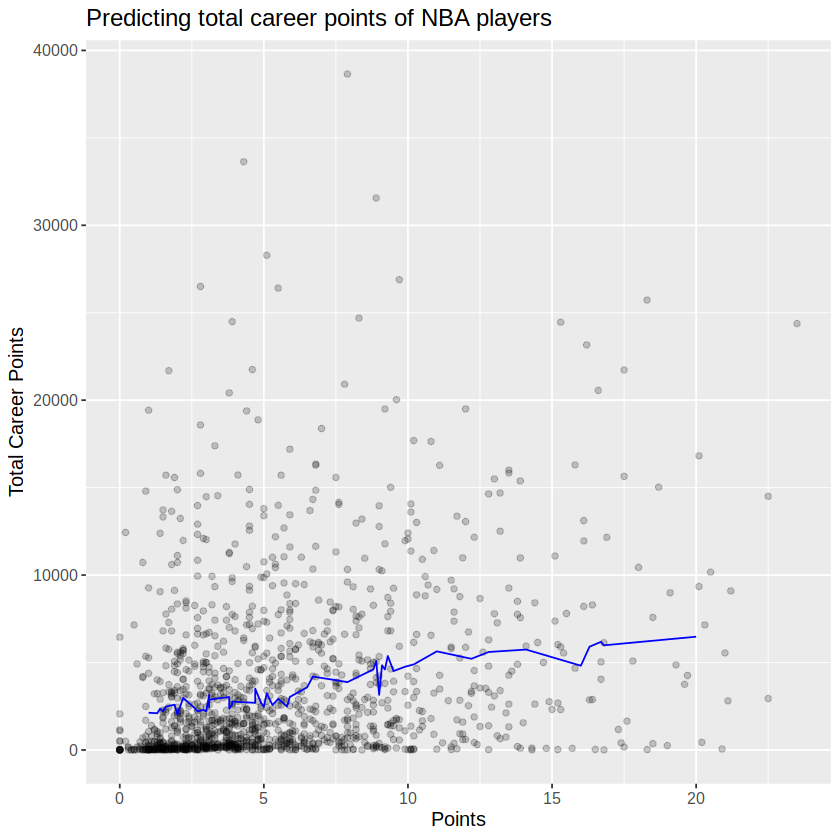

In [40]:
#Visualization
###############################################################
####plot of points vs. total points
nba_plot_pts_vs_tp <- ggplot(nba_training_labelled, aes(x = pts,
                                                y = total_points)) +
  geom_point(alpha = 0.2) +
  geom_line(data = nba_preds, aes(x = pts, y = .pred), color = "blue") +
  labs(x = "Points", y = "Total Career Points", title = "Predicting total career points of NBA players") + 
  theme(text = element_text(size = 12))
nba_plot_pts_vs_tp


## Discussion ##
Prompts
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

Response:

- summary: summarize each knn graph, conclusion: who is expected to score the most points (the correlation)
- expectation: expectations vs what we found, talk about weaknesses in method and why we chose the method
- impact: how nba teams could use this, how important is rookie data, are stats a good indicator of future performance etc.
- future questions: how injuries could impact these predictions, predict other stats e.g assists, rebounds, team environment etc...

Response from expected outcomes and significance in project proposal
- We are trying to find the total points that a player may score at the end of his career based on other players' previous performance including points per game, games played, heights, weights, true shooting percentage and their usage percentage. 

- NBA teams could use this predicted score to identify whether a rookie player has potential or not. Also, it may be a useful index to determine a player's future trajectory. 

- This prediction model does not account for injuries and other factors. The player could improve significantly over the years and thus their rookie year statistics may not be helpful in predicting how they will perform in the future. Future questions we can also explore would be how their attributes and rookie statistics can predict other measures of performance such as assists, rebounds, etc. This way we can have a better description and prediction of their future career, not just in terms of points.

## References ##
